<a href="https://colab.research.google.com/github/brianbaert/CapitaSelecta_IntruDTree/blob/main/CapitaSelecta_Project_nieuweDataset_DDOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capita Selecta project - IntruDTree
Team members: Daan Wesselman, Brian Baert


### Necessary imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
import random
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
random.seed(datetime.now().timestamp())

## Using same methods on different dataset
Sharafaldin, I., Lashkari, A. H., Ghorbani, A. A. (2018). Towards generating a new intrusion detection dataset and intrusion traffic characterization. Proceedings of the 4th international conference on information systems security and privacy, 108-116
[DOI](https://www.scitepress.org/papers/2018/66398/66398.pdf)



### Exploring the dataset
The dataset can be found via this [link](https://www.unb.ca/cic/datasets/ids-2017.html).

The dataset contains of 8 sub-datasets with different attack-types as label. All of them are much larger than the dataset used in the original paper of Sarker et al. This notebook analyses the ddos-attacks subset: 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#from google.colab import files
#uploaded=files.upload()
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IntruDTree_dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [ ]:
train[[' Label']].value_counts()

 Label
DDoS      128027
BENIGN     97718
dtype: int64

In [ ]:
train.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


## Removing some rows
The variables 'Flow Bytes/s' and ' Flow Packets/s' have 30 and 34 (overlapping) rows with missing values. These instances are removed

In [ ]:
train = train[train['Flow Bytes/s'] != np.inf].reset_index(drop=True)
train = train[train[' Flow Packets/s'] != np.inf].reset_index(drop=True)
train.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225711.000000,2.257110e+05,225711.000000,225711.000000,225711.000000,2.257110e+05,225711.000000,225711.000000,225711.000000,225711.000000,...,225711.00000,225711.000000,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05
mean,8876.556769,1.624410e+07,4.875389,4.573424,939.603147,5.961369e+03,538.615499,27.885810,164.850580,214.939117,...,3.31193,21.482338,1.848539e+05,1.293631e+04,2.081162e+05,1.776468e+05,1.032370e+07,3.612487e+06,1.288007e+07,7.756523e+06
std,19752.018851,3.152612e+07,15.423986,21.756929,3249.628245,3.922122e+04,1864.258043,163.336194,504.927243,797.466898,...,12.27089,4.166228,7.979819e+05,2.102894e+05,9.002992e+05,7.843163e+05,2.185431e+07,1.275778e+07,2.692283e+07,1.983236e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,7.123800e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.00000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,1.453164e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.00000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,8.806652e+06,5.000000,5.000000,64.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.00000,20.000000,1.879000e+03,0.000000e+00,1.879000e+03,1.863000e+03,8.241416e+06,0.000000e+00,8.254452e+06,7.423865e+06
max,65532.000000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.00000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


<Axes: title={'center': 'Distribution of Flow Bytes/s'}>

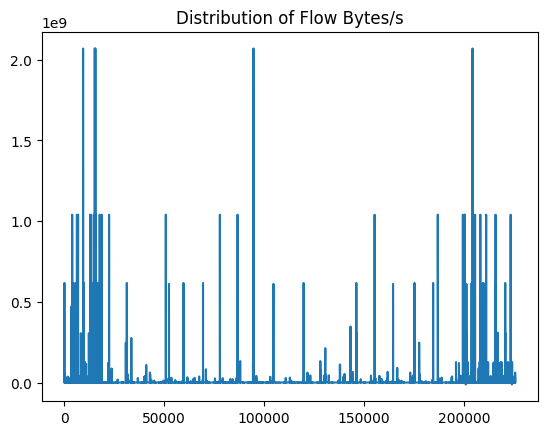

In [ ]:
train['Flow Bytes/s'].plot(title='Distribution of Flow Bytes/s')

### Cleaning up the dataset


1.   Feature encoding (not needed for this dataset, there are no categorical variables)
2.   Feature scaling



In [ ]:
y = train[' Label']
train.drop(' Label', axis='columns', inplace=True)

In [ ]:
len(y) - y.value_counts()['BENIGN']

128025

In [ ]:
X = train

In [ ]:
scaler = StandardScaler()
for col in X.columns:
  temp = np.array(X[col]).reshape(-1,1)
  temp_scaled = scaler.fit_transform(temp)
  X[col] = temp_scaled.flatten()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225711 entries, 0 to 225710
Data columns (total 78 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225711 non-null  float64
 1    Flow Duration                225711 non-null  float64
 2    Total Fwd Packets            225711 non-null  float64
 3    Total Backward Packets       225711 non-null  float64
 4   Total Length of Fwd Packets   225711 non-null  float64
 5    Total Length of Bwd Packets  225711 non-null  float64
 6    Fwd Packet Length Max        225711 non-null  float64
 7    Fwd Packet Length Min        225711 non-null  float64
 8    Fwd Packet Length Mean       225711 non-null  float64
 9    Fwd Packet Length Std        225711 non-null  float64
 10  Bwd Packet Length Max         225711 non-null  float64
 11   Bwd Packet Length Min        225711 non-null  float64
 12   Bwd Packet Length Mean       225711 non-nul

Perform the Train-Test-Split on the entire dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(0,10000))

### Calculating feature importance and ranking

First attempt is a random Decision Tree Classifier

In [ ]:
FeatImportanceTree = DecisionTreeClassifier(criterion='gini', random_state=random.randint(0,10000))
FeatImportanceTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3774)

In [ ]:
importances = {}
importanceList = FeatImportanceTree.feature_importances_
for feat, value in enumerate(importanceList):
  importances[X_train.columns[feat]] = np.round(value, 5)
sort_importances = sorted(importances.items(), key=lambda k: k[1], reverse=True)
pprint.pprint(sort_importances)

[(' Fwd Packet Length Max', 0.57263),
 (' Subflow Fwd Bytes', 0.42087),
 ('Init_Win_bytes_forward', 0.00218),
 (' Destination Port', 0.00129),
 (' Bwd Packet Length Min', 0.00087),
 (' Init_Win_bytes_backward', 0.00067),
 ('Subflow Fwd Packets', 0.0003),
 (' Bwd Header Length', 0.00029),
 ('FIN Flag Count', 0.00019),
 (' Bwd Packets/s', 0.00018),
 (' Flow IAT Min', 0.00014),
 (' Fwd Packet Length Std', 0.0001),
 ('Fwd Packets/s', 9e-05),
 (' ACK Flag Count', 5e-05),
 (' Flow IAT Mean', 4e-05),
 (' Fwd IAT Mean', 4e-05),
 (' URG Flag Count', 4e-05),
 (' Fwd IAT Max', 2e-05),
 ('Flow Bytes/s', 1e-05),
 (' Flow Duration', 0.0),
 (' Total Fwd Packets', 0.0),
 (' Total Backward Packets', 0.0),
 ('Total Length of Fwd Packets', 0.0),
 (' Total Length of Bwd Packets', 0.0),
 (' Fwd Packet Length Min', 0.0),
 (' Fwd Packet Length Mean', 0.0),
 ('Bwd Packet Length Max', 0.0),
 (' Bwd Packet Length Mean', 0.0),
 (' Bwd Packet Length Std', 0.0),
 (' Flow Packets/s', 0.0),
 (' Flow IAT Std', 0.0),


second attempt is a Random Forest classifier (multiple decision trees in an ensemble)

In [ ]:
FeatImportanceForest = RandomForestClassifier(criterion='gini', random_state=random.randint(0,10000))
FeatImportanceForest.fit(X_train, y_train)

RandomForestClassifier(random_state=9350)

In [ ]:
importanceList = {}
importanceList = FeatImportanceForest.feature_importances_
for feat, value in enumerate(importanceList):
  importances[X_train.columns[feat]] = np.round(value, 5)
sort_importances = sorted(importances.items(), key=lambda k: k[1], reverse=True)
pprint.pprint(sort_importances)

[(' Fwd Packet Length Max', 0.11018),
 (' Avg Fwd Segment Size', 0.08445),
 (' Fwd Packet Length Mean', 0.08101),
 ('Total Length of Fwd Packets', 0.08076),
 ('Subflow Fwd Packets', 0.06945),
 (' Subflow Fwd Bytes', 0.0554),
 ('Fwd IAT Total', 0.04322),
 (' act_data_pkt_fwd', 0.04239),
 (' Fwd Header Length.1', 0.04169),
 ('Init_Win_bytes_forward', 0.04099),
 (' Fwd IAT Std', 0.03681),
 (' Fwd Header Length', 0.02729),
 (' Total Fwd Packets', 0.02358),
 (' Fwd IAT Max', 0.01797),
 (' Subflow Bwd Bytes', 0.01721),
 (' Bwd Header Length', 0.01688),
 (' Fwd IAT Mean', 0.01685),
 (' Destination Port', 0.01673),
 (' Average Packet Size', 0.01503),
 (' Bwd Packet Length Min', 0.01298),
 (' Init_Win_bytes_backward', 0.01164),
 ('Bwd Packet Length Max', 0.01019),
 (' Packet Length Mean', 0.00918),
 (' Flow IAT Std', 0.00859),
 (' Avg Bwd Segment Size', 0.00857),
 (' Bwd IAT Mean', 0.00841),
 (' Bwd Packet Length Mean', 0.00801),
 (' Subflow Bwd Packets', 0.00797),
 (' Bwd IAT Std', 0.00765),
 


In the paper the researchers chose all features with a value above $t=0.02$.

In [ ]:
#select important features
imp_feature_list = []
for feat in enumerate(sort_importances):
  if feat[1][1] > 0.02:
    imp_feature_list.append(feat[1][0])
pprint.pprint(imp_feature_list)

[' Fwd Packet Length Max',
 ' Avg Fwd Segment Size',
 ' Fwd Packet Length Mean',
 'Total Length of Fwd Packets',
 'Subflow Fwd Packets',
 ' Subflow Fwd Bytes',
 'Fwd IAT Total',
 ' act_data_pkt_fwd',
 ' Fwd Header Length.1',
 'Init_Win_bytes_forward',
 ' Fwd IAT Std',
 ' Fwd Header Length',
 ' Total Fwd Packets']


We see that the amount of importance features is slightly larger (16) than for the original dataset (14)

### Designing the decision tree

In [ ]:
IDT_DS_x = X_train[imp_feature_list]
IDTTree = DecisionTreeClassifier(criterion='gini', random_state=random.randint(0,10000))

In [ ]:
cross_val_score(IDTTree, IDT_DS_x, y_train, cv=10)

array([0.99950158, 0.99928006, 0.99955696, 0.99966772, 0.99955696,
       0.9994462 , 0.9994462 , 0.99955696, 0.99950155, 0.99961232])

In [ ]:
IDTForest = RandomForestClassifier(criterion='gini', random_state=random.randint(0,10000))
IDTForest.fit(IDT_DS_x, y_train)

RandomForestClassifier(random_state=8476)

### Experimental results

### IntruDTree

Comparable good results as for original dataset

In [ ]:
y_pred = IDTForest.predict(X_test[imp_feature_list])
print("Accuracy of Random Forest:", accuracy_score(y_test, y_pred))
print("Precision of Random Forest:", precision_score(y_test, y_pred,pos_label='DDoS'))
print("Recall of Random Forest:", recall_score(y_test, y_pred,pos_label='DDoS'))
print("Fscore of Random Forest:", f1_score(y_test, y_pred,pos_label='DDoS'))

Accuracy of Random Forest: 0.9996012670845978
Precision of Random Forest: 0.9996486433730236
Recall of Random Forest: 0.9996486433730236
Fscore of Random Forest: 0.9996486433730236


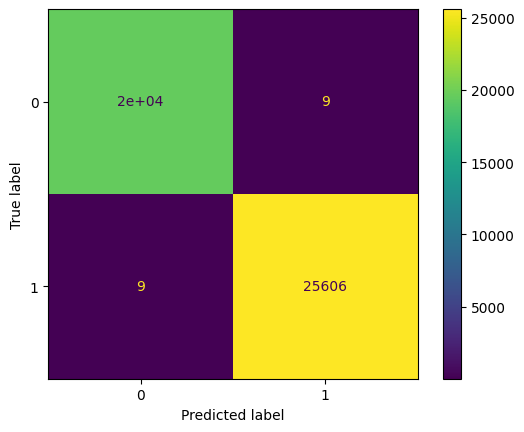

In [ ]:
confMatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confMatrix).plot()

In [ ]:
y_pred

array(['BENIGN', 'BENIGN', 'DDoS', ..., 'DDoS', 'BENIGN', 'DDoS'],
      dtype=object)

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
traffic = {'BENIGN': 0, 'DDoS': 1}
y_test_int = np.vectorize(traffic.get)(y_test)
y_pred_int = np.vectorize(traffic.get)(y_pred)

In [ ]:
y_test_int

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
y_pred_int

array([0, 0, 1, ..., 1, 0, 1])

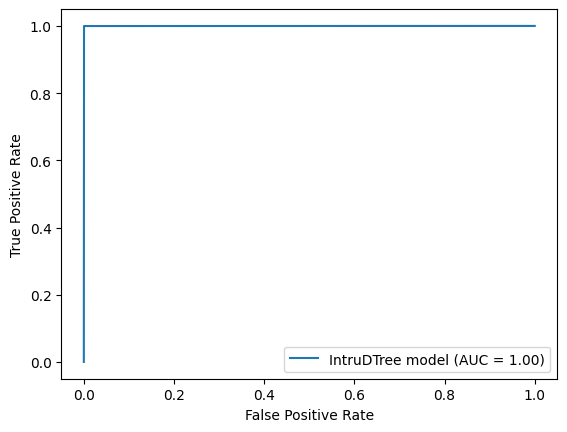

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_int, y_pred_int, pos_label=1)
roc_auc = auc(fpr,tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='IntruDTree model')
display.plot()
plt.show()

In [ ]:
print(roc_auc)

0.9995938833415713


### Logistic Regression

##  
There are issues with the multicollinearity of features, I suggest we set up the correlation matrix and decide wich features to skip or use a different solver


In [ ]:
corr = IDT_DS_x.corr()
corr.style.background_gradient(cmap='coolwarm')

,Fwd Packet Length Max,Avg Fwd Segment Size,Fwd Packet Length Mean,Total Length of Fwd Packets,Subflow Fwd Packets,Subflow Fwd Bytes,Fwd IAT Total,act_data_pkt_fwd,Fwd Header Length.1,Init_Win_bytes_forward,Fwd IAT Std,Fwd Header Length,Total Fwd Packets
Fwd Packet Length Max,1.000000,0.940345,0.940345,0.851092,0.042212,0.851092,0.285624,0.036268,0.041719,0.029833,0.389439,0.041719,0.042212
Avg Fwd Segment Size,0.940345,1.000000,1.000000,0.856653,0.017606,0.856653,0.255468,0.013541,0.017462,0.004161,0.367192,0.017462,0.017606
Fwd Packet Length Mean,0.940345,1.000000,1.000000,0.856653,0.017606,0.856653,0.255468,0.013541,0.017462,0.004161,0.367192,0.017462,0.017606
Total Length of Fwd Packets,0.851092,0.856653,0.856653,1.000000,0.171006,1.000000,0.300972,0.159454,0.173069,0.057972,0.356266,0.173069,0.171006
Subflow Fwd Packets,0.042212,0.017606,0.017606,0.171006,1.000000,0.171006,0.207829,0.889887,0.970121,0.107313,0.087258,0.970121,1.000000
Subflow Fwd Bytes,0.851092,0.856653,0.856653,1.000000,0.171006,1.000000,0.300972,0.159454,0.173069,0.057972,0.356266,0.173069,0.171006
Fwd IAT Total,0.285624,0.255468,0.255468,0.300972,0.207829,0.300972,1.000000,0.196754,0.187033,-0.097944,0.900072,0.187033,0.207829
act_data_pkt_fwd,0.036268,0.013541,0.013541,0.159454,0.889887,0.159454,0.196754,1.000000,0.790757,0.042446,0.092133,0.790757,0.889887
Fwd Header Length.1,0.041719,0.017462,0.017462,0.173069,0.970121,0.173069,0.187033,0.790757,1.000000,0.148324,0.071029,1.000000,0.970121
Init_Win_bytes_forward,0.029833,0.004161,0.004161,0.057972,0.107313,0.057972,-0.097944,0.042446,0.148324,1.000000,-0.190787,0.148324,0.107313


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = IDT_DS_x.columns
vif["vif_Factor"] = [variance_inflation_factor(IDT_DS_x.values, i) for i in range(IDT_DS_x.shape[1])]
vif = vif[vif.vif_Factor < 10]
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,vif_Factor
0,Fwd Packet Length Max,9.480157
6,Fwd IAT Total,6.259833
7,act_data_pkt_fwd,8.534815
9,Init_Win_bytes_forward,1.140778
10,Fwd IAT Std,6.705412


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
import random
lrCV = LogisticRegressionCV(cv=10, random_state=random.randint(0,10000), max_iter=100, solver='lbfgs', verbose=True).fit(IDT_DS_x[vif.features], y_train)
#lrCV = LogisticRegressionCV(cv=10, random_state=random.randint(0,10000), max_iter=100, solver='newton-cholesky', verbose=True).fit(IDT_DS_x[vif.features], y_train)
# there are warnings
y_pred = lrCV.predict(X_test[vif.features])

print("Accuracy of LR:", accuracy_score(y_test, y_pred))
print("Precision of LR:", precision_score(y_test, y_pred,pos_label='DDoS'))
print("Recall of LR:", recall_score(y_test, y_pred,pos_label='DDoS'))
print("Fscore of LR:", f1_score(y_test, y_pred,pos_label='DDoS'))


Accuracy of LR: 0.9689874399131648
Precision of LR: 0.9498420954857886
Recall of LR: 0.9980480187390202
Fscore of LR: 0.9733485627260612


The resulting accuracy (default returned score) is 0.97

### SVM

In [ ]:
from sklearn.svm import SVC
svCV = SVC(random_state=random.randint(0,10000), gamma='auto')
svCV.fit(IDT_DS_x, y_train)
y_pred = svCV.predict(X_test[imp_feature_list])

print("Accuracy of SVM:", accuracy_score(y_test, y_pred))
print("Precision of SVM:", precision_score(y_test, y_pred,pos_label='DDoS'))
print("Recall of SVM:", recall_score(y_test, y_pred,pos_label='DDoS'))
print("Fscore of SVM", f1_score(y_test, y_pred,pos_label='DDoS'))

Accuracy of SVM: 0.9921361008351239
Precision of SVM: 0.9886636229977559
Recall of SVM: 0.997579543236385
Fscore of SVM 0.9931015720642816


The resulting accuracy (defeault return score) is 0.99, larger than the 0.95-score for the original dataset

### NB
We use GaussianNB and will define the prior probabilities of each class by investigating the number of occurrences of each class in the training dataset

In [ ]:
np.array(np.unique(y_train, return_counts=True)).T

array([['BENIGN', 78158],
       ['DDoS', 102410]], dtype=object)

In [ ]:
#the priors need to be adjusted to the output of the count function above
prior_anomaly = 102551/(102551+78017)
prior_normal = 78017/(102551+78017)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB(priors=[prior_normal, prior_anomaly])
nb.fit(IDT_DS_x, y_train)
y_pred = nb.predict(X_test[imp_feature_list])

print("Accuracy of NB:", accuracy_score(y_test, y_pred))
print("Precision of NB:", precision_score(y_test, y_pred,pos_label='DDoS'))
print("Recall of NB:", recall_score(y_test, y_pred,pos_label='DDoS'))
print("Fscore of NB", f1_score(y_test, y_pred,pos_label='DDoS'))

Accuracy of NB: 0.8959085572514011
Precision of NB: 0.8449891139407535
Recall of NB: 1.0
Fscore of NB 0.9159827638613242


The results of the Gaussian Naive Bayes approach is much lager than for the original dataset (0.98 versus 0.61)


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(IDT_DS_x,y_train)
y_pred = knc.predict(X_test[imp_feature_list])

print("Accuracy of KNN:", accuracy_score(y_test, y_pred))
print("Precision of KNN:", precision_score(y_test, y_pred,pos_label='DDoS'))
print("Recall of KNN:", recall_score(y_test, y_pred,pos_label='DDoS'))
print("Fscore of KNN", f1_score(y_test, y_pred,pos_label='DDoS'))

Accuracy of KNN: 0.999313293312363
Precision of KNN: 0.9993364040908737
Recall of KNN: 0.9994534452469256
Fscore of KNN 0.9993949212421682


Results are again better than for original dataset (0.991 versus 0.999)